In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
import numpy as np
import pandas as pd
import string

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
data = pd.read_csv("data.csv")
data["name"] = data["name"].astype("str")
data = data.fillna(0)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
data = data[(data["availability_365"] > 0) & (data["number_of_reviews"] > 0) & (data["price"] > 0)]
data["popularity"] = data["reviews_per_month"]*data["minimum_nights"]/data["availability_365"]

In [4]:
'''
lengths, capitals, exclamations, punctuation, words, pos_sent, adjs, ppns = [], [], [], [], [], [], [], []
sid = SentimentIntensityAnalyzer()
for i in range(len(data)):
    name = data.loc[i, "name"]
    lengths.append(len(name))
    capitals.append(sum(1 for ch in name if ch.isupper()))
    exclamations.append(name.count("!"))
    punctuation.append(sum(1 for ch in name if ch in string.punctuation))
    tokenized = [word for word in nltk.word_tokenize(name) if word.isalpha()]
    words.append(len(tokenized))
    pos_sent.append(sid.polarity_scores(name)["pos"])
    poses = nltk.pos_tag(tokenized)
    adjs.append(sum(1 for pos in poses if pos[1] in ("JJ", "JJR", "JJS")))
    ppns.append(sum(1 for pos in poses if pos[1] in ("NNP", "NNPS")))
'''

'\nlengths, capitals, exclamations, punctuation, words, pos_sent, adjs, ppns = [], [], [], [], [], [], [], []\nsid = SentimentIntensityAnalyzer()\nfor i in range(len(data)):\n    name = data.loc[i, "name"]\n    lengths.append(len(name))\n    capitals.append(sum(1 for ch in name if ch.isupper()))\n    exclamations.append(name.count("!"))\n    punctuation.append(sum(1 for ch in name if ch in string.punctuation))\n    tokenized = [word for word in nltk.word_tokenize(name) if word.isalpha()]\n    words.append(len(tokenized))\n    pos_sent.append(sid.polarity_scores(name)["pos"])\n    poses = nltk.pos_tag(tokenized)\n    adjs.append(sum(1 for pos in poses if pos[1] in ("JJ", "JJR", "JJS")))\n    ppns.append(sum(1 for pos in poses if pos[1] in ("NNP", "NNPS")))\n'

In [5]:
'''
data["length"] = lengths
data["capitals"] = capitals
data["exclamations"] = exclamations
data["punctuation"] = punctuation
data["words"] = words
data["pos_sent"] = pos_sent
data["adjs"] = adjs
data["ppns"] = ppns
data["capitals"] = data["capitals"] - data["ppns"]
data["pct_capitals"] = data["capitals"]/data["length"]
'''

'\ndata["length"] = lengths\ndata["capitals"] = capitals\ndata["exclamations"] = exclamations\ndata["punctuation"] = punctuation\ndata["words"] = words\ndata["pos_sent"] = pos_sent\ndata["adjs"] = adjs\ndata["ppns"] = ppns\ndata["capitals"] = data["capitals"] - data["ppns"]\ndata["pct_capitals"] = data["capitals"]/data["length"]\n'

In [6]:
# data.to_csv("data_with_text_features.csv")

In [7]:
QUANTILES = [0, 0.2, 0.4, 0.6, 0.8, 1]
lengths_dist = [[0 for i in range(len(QUANTILES)-1)] for j in range(len(QUANTILES)-1)]
capitals_dist = [[0 for i in range(len(QUANTILES)-1)] for j in range(len(QUANTILES)-1)]
pct_capitals_dist = [[0 for i in range(len(QUANTILES)-1)] for j in range(len(QUANTILES)-1)]
exclamations_dist = [[0 for i in range(len(QUANTILES)-1)] for j in range(len(QUANTILES)-1)]
punctuation_dist = [[0 for i in range(len(QUANTILES)-1)] for j in range(len(QUANTILES)-1)]
words_dist = [[0 for i in range(len(QUANTILES)-1)] for j in range(len(QUANTILES)-1)]
pos_sent_dist = [[0 for i in range(len(QUANTILES)-1)] for j in range(len(QUANTILES)-1)]
adjs_dist = [[0 for i in range(len(QUANTILES)-1)] for j in range(len(QUANTILES)-1)]
ppns_dist = [[0 for i in range(len(QUANTILES)-1)] for j in range(len(QUANTILES)-1)]
most_freqs = [[{} for i in range(len(QUANTILES)-1)] for j in range(len(QUANTILES)-1)]

sid = SentimentIntensityAnalyzer()
for i in range(len(QUANTILES)-1):
    for j in range(len(QUANTILES)-1):
        selection = data[(data["price"] >= data["price"].quantile(QUANTILES[i])) & 
                         (data["price"] <= data["price"].quantile(QUANTILES[i+1]))]
        selection = selection[(selection["popularity"] >= data["popularity"].quantile(QUANTILES[j])) & 
                              (selection["popularity"] <= data["popularity"].quantile(QUANTILES[j+1]))]
        
        lengths, capitals, pct_capitals, exclamations, punctuation, words, pos_sent = [], [], [], [], [], [], []
        adjs, ppns = [], []
        for name in selection["name"]:
            lengths.append(len(name))
            capitals.append(sum(1 for ch in name if ch.isupper()))
            if len(name) != 0:
                pct_capitals.append(sum(1 for ch in name if ch.isupper())/(len(name)))
            else:
                pct_capitals.append(0)
            exclamations.append(name.count("!"))
            punctuation.append(sum(1 for ch in name if ch in string.punctuation))
            tokenized = [word for word in nltk.word_tokenize(name) if word.isalpha()]
            words.append(len(tokenized))
            pos_sent.append(sid.polarity_scores(name)["pos"])
            poses = nltk.pos_tag(tokenized)
            adjs.append(sum(1 for pos in poses if pos[1] in ("JJ", "JJR", "JJS")))
            ppns.append(sum(1 for pos in poses if pos[1] in ("NNP", "NNPS")))
        
        lengths_dist[i][j] = np.mean(lengths)
        capitals_dist[i][j] = np.mean(capitals)
        pct_capitals_dist[i][j] = np.mean(pct_capitals)
        exclamations_dist[i][j] = np.mean(exclamations)
        punctuation_dist[i][j] = np.mean(punctuation)
        words_dist[i][j] = np.mean(words)
        pos_sent_dist[i][j] = np.mean(pos_sent)
        adjs_dist[i][j] = np.mean(adjs)
        ppns_dist[i][j] = np.mean(ppns)
        most_freqs[i][j] = FreqDist(word.lower() for word in nltk.word_tokenize(" ".join(selection["name"])) if len(word) > 3).most_common(10)

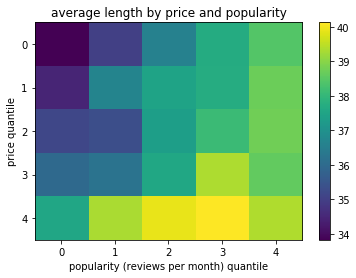

In [8]:
plt.imshow(lengths_dist, aspect="auto")
plt.colorbar()
plt.ylabel("price quantile")
plt.xlabel("popularity (reviews per month) quantile")
plt.title("average length by price and popularity")

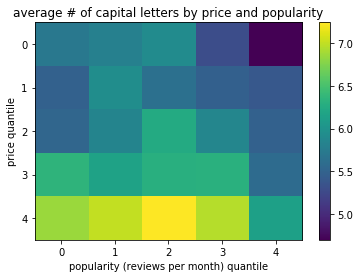

In [9]:
plt.imshow(capitals_dist, aspect="auto")
plt.colorbar()
plt.ylabel("price quantile")
plt.xlabel("popularity (reviews per month) quantile")
plt.title("average # of capital letters by price and popularity")

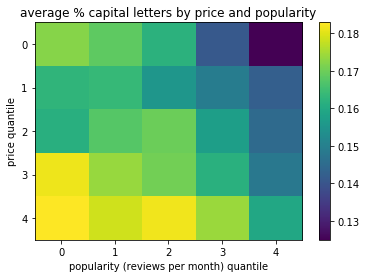

In [10]:
plt.imshow(pct_capitals_dist, aspect="auto")
plt.colorbar()
plt.ylabel("price quantile")
plt.xlabel("popularity (reviews per month) quantile")
plt.title("average % capital letters by price and popularity")

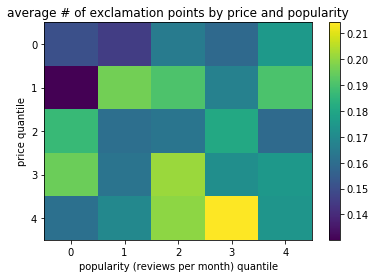

In [11]:
plt.imshow(exclamations_dist, aspect="auto")
plt.colorbar()
plt.ylabel("price quantile")
plt.xlabel("popularity (reviews per month) quantile")
plt.title("average # of exclamation points by price and popularity")

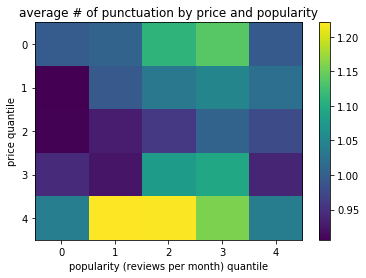

In [12]:
plt.imshow(punctuation_dist, aspect="auto")
plt.colorbar()
plt.ylabel("price quantile")
plt.xlabel("popularity (reviews per month) quantile")
plt.title("average # of punctuation by price and popularity")

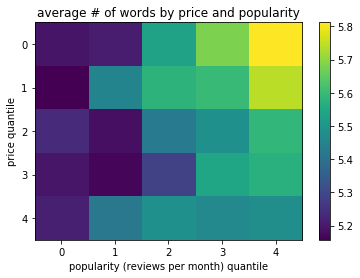

In [13]:
plt.imshow(words_dist, aspect="auto")
plt.colorbar()
plt.ylabel("price quantile")
plt.xlabel("popularity (reviews per month) quantile")
plt.title("average # of words by price and popularity")

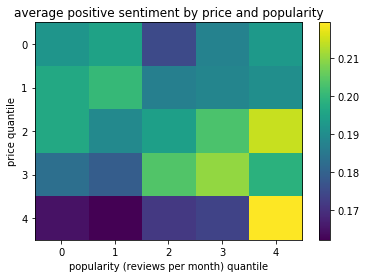

In [14]:
plt.imshow(pos_sent_dist, aspect="auto")
plt.colorbar()
plt.ylabel("price quantile")
plt.xlabel("popularity (reviews per month) quantile")
plt.title("average positive sentiment by price and popularity")

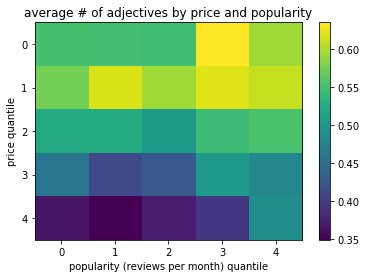

In [15]:
plt.imshow(adjs_dist, aspect="auto")
plt.colorbar()
plt.ylabel("price quantile")
plt.xlabel("popularity (reviews per month) quantile")
plt.title("average # of adjectives by price and popularity")

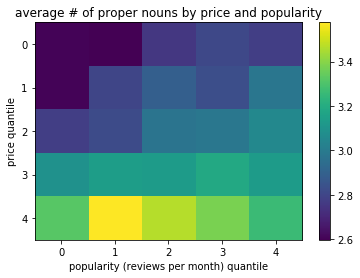

In [16]:
plt.imshow(ppns_dist, aspect="auto")
plt.colorbar()
plt.ylabel("price quantile")
plt.xlabel("popularity (reviews per month) quantile")
plt.title("average # of proper nouns by price and popularity")

In [17]:
for i in range(len(QUANTILES)-1):
    for j in range(len(QUANTILES)-1):
        print("price quantile", i, "popularity quantile", j)
        print(most_freqs[i][j])
    print("-----")

price quantile 0 popularity quantile 0
[('room', 511), ('private', 220), ('cozy', 140), ('bedroom', 131), ('brooklyn', 109), ('manhattan', 84), ('near', 74), ('home', 72), ('with', 57), ('large', 55)]
price quantile 0 popularity quantile 1
[('room', 503), ('private', 273), ('cozy', 180), ('bedroom', 149), ('brooklyn', 109), ('manhattan', 107), ('near', 71), ('from', 58), ('beautiful', 56), ('with', 56)]
price quantile 0 popularity quantile 2
[('room', 476), ('private', 250), ('cozy', 152), ('bedroom', 120), ('manhattan', 112), ('brooklyn', 93), ('near', 77), ('with', 61), ('apartment', 60), ('from', 59)]
price quantile 0 popularity quantile 3
[('room', 448), ('private', 272), ('cozy', 167), ('bedroom', 141), ('brooklyn', 98), ('manhattan', 79), ('near', 77), ('apartment', 63), ('home', 61), ('from', 61)]
price quantile 0 popularity quantile 4
[('room', 428), ('private', 239), ('cozy', 181), ('bedroom', 152), ('brooklyn', 118), ('manhattan', 99), ('apartment', 79), ('with', 77), ('bushw

In [18]:
freqs = FreqDist(word.lower() for word in nltk.word_tokenize(" ".join(data["name"])) if len(word) > 3).most_common(500)
freqs_words = set(word[0] for word in freqs)
avg_prices = {word: [0, 0] for word in freqs_words}
for row in data.iterrows():
    name, price = row[1]["name"], row[1]["price"]
    name_set = set(word.lower() for word in nltk.word_tokenize(name))
    for word in freqs_words:
        if word in name_set:
            avg_prices[word][0] += price
            avg_prices[word][1] += 1
avg_prices = {avg_prices[word][0]/avg_prices[word][1]: word for word in avg_prices if avg_prices[word][1] > 3}
avg_prices

{31.210526315789473: 'male',
 43.391304347826086: 'hostel',
 48.02857142857143: 'medical',
 54.41269841269841: 'female',
 55.36363636363637: 'professionals',
 55.69230769230769: 'cheap',
 57.983739837398375: 'shared',
 59.50684931506849: 'share',
 60.40909090909091: 'cleaning',
 62.509433962264154: 'budget',
 62.64: 'crash',
 63.34782608695652: 'mall',
 63.714285714285715: 'couch',
 65.64516129032258: 'traveler',
 66.0: 'bunk',
 67.45454545454545: 'solo',
 71.04545454545455: 'inwood',
 75.19327731092437: 'bronx',
 75.26315789473684: 'guesthouse',
 75.33333333333333: 'prvt',
 75.91111111111111: 'twin',
 76.87096774193549: 'laguardia',
 77.5: 'woodside',
 77.91695043511162: 'room',
 78.38235294117646: 'stadium',
 79.6842105263158: 'rent',
 79.8076923076923: 'person',
 79.8695652173913: 'jackson',
 80.21739130434783: 'sublet',
 82.33333333333333: 'blue',
 82.57142857142857: 'closet',
 82.59016393442623: 'nice',
 82.98165137614679: 'affordable',
 83.52777777777777: 'ridgewood',
 83.9657142

In [19]:
freqs = FreqDist(word.lower() for word in nltk.word_tokenize(" ".join(data["name"])) if len(word) > 3).most_common(500)
freqs_words = set(word[0] for word in freqs)
avg_pops = {word: [0, 0] for word in freqs_words}
for row in data.iterrows():
    name, pop = row[1]["name"], row[1]["popularity"]
    name_set = set(word.lower() for word in nltk.word_tokenize(name))
    for word in freqs_words:
        if word in name_set:
            avg_pops[word][0] += pop
            avg_pops[word][1] += 1
avg_pops = {avg_pops[word][0]/avg_pops[word][1]: word for word in avg_pops if avg_pops[word][1] > 3}
avg_pops

{0.01412107184201064: 'exchange',
 0.0177218590041433: 'night',
 0.018277156836389193: 'serviced',
 0.020332195441133: 'guesthouse',
 0.02213240403769351: 'sleek',
 0.022610130436932354: 'wyndham',
 0.0239153991878055: 'ocean',
 0.02441030431439084: 'hostel',
 0.02454900582287464: 'gowanus',
 0.024668160176227735: 'fee*',
 0.024930272503765682: 'sonder',
 0.02718479027405875: 'factory',
 0.029355893524666134: 'paradise',
 0.029470355935198252: 'ditmas',
 0.031352349976734126: 'washer',
 0.03222335121474563: 'sofa',
 0.0323978709440271: 'victorian',
 0.03356971154489066: 'nash',
 0.03393208095428625: 'beekman',
 0.03440297442057648: 'smart',
 0.03668515212740964: 'hotel',
 0.03767408975843299: 'male',
 0.038577678372476595: 'cottage',
 0.04210688447549467: '2bedroom',
 0.04261850768553753: 'service',
 0.04419138858747543: 'staten',
 0.04512793052281538: 'parlor',
 0.046612994114913084: 'jackson',
 0.046960429106767204: 'deluxe',
 0.047609014560373884: 'washer/dryer',
 0.0488432925123462